RMSE com validação cruzada: 68.30998801890708
RMSE no conjunto de teste: 55.99040910017207


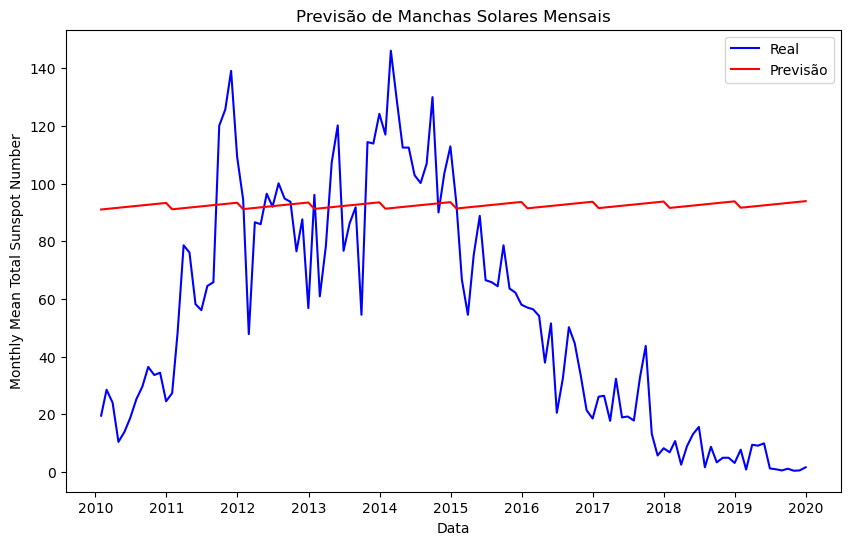

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 1. Carregar os dados
df = pd.read_csv('monthly-sunspots.csv')

# 2. Processar a coluna Date
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# 3. Criar novas features (ano, mês, indicador de tempo contínuo)
df['Days'] = (df['Date'] - df['Date'].min()).dt.days


# Definir X (features) e Y (alvo)
X = df[['Year', 'Days']]  # Features temporais e transformações
Y = df['Monthly Mean Total Sunspot Number']  # Alvo

# 4. Separar em treino (antes de 2010) e teste (2010-2019)
train_data = df[df['Year'] < 2010]
test_data = df[df['Year'] >= 2010]

X_train = train_data[['Year', 'Days']]
Y_train = train_data['Monthly Mean Total Sunspot Number']

X_test = test_data[['Year', 'Days']]
Y_test = test_data['Monthly Mean Total Sunspot Number']

# 5. Aplicar k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Modelo de regressão linear
model = LinearRegression()

# Previsões com validação cruzada
Y_pred = cross_val_predict(model, X_train, Y_train, cv=kf)

# Calcular o RMSE
rmse = np.sqrt(mean_squared_error(Y_train, Y_pred))
print(f'RMSE com validação cruzada: {rmse}')

# 6. Treinar o modelo final nos dados de treino e testar nos dados de teste
model.fit(X_train, Y_train)
Y_test_pred = model.predict(X_test)

# Calcular o RMSE no conjunto de teste
rmse_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
print(f'RMSE no conjunto de teste: {rmse_test}')

# 7. Plotar os resultados
plt.figure(figsize=(10,6))
plt.plot(test_data['Date'], Y_test, label='Real', color='blue')
plt.plot(test_data['Date'], Y_test_pred, label='Previsão', color='red')
plt.xlabel('Data')
plt.ylabel('Monthly Mean Total Sunspot Number')
plt.title('Previsão de Manchas Solares Mensais')
plt.legend()
plt.show()
